In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import cv2

import pandas as pd
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [24]:
#Changing Categorical Labels into Numeric Values
def toNumeric(genre):
    if genre == 'Action':
        return 0
    if genre == 'Adult':
        return 1
    elif genre == 'Adventure':
        return 2
    elif genre == 'Animation':
        return 3
    elif genre == 'Biography':
        return 4
    elif genre == 'Comedy':
        return 5
    elif genre == 'Crime':
        return 6
    elif genre == 'Documentary':
        return 7
    elif genre == 'Drama':
        return 8
    elif genre == 'Family':
        return 9
    elif genre == 'Fantasy':
        return 10
    elif genre == 'History':
        return 11
    elif genre == 'Horror':
        return 12
    elif genre == 'Music':
        return 13
    elif genre == 'Musical':
        return 14
    elif genre == 'Mystery':
        return 15
    elif genre == 'Romance':
        return 16
    elif genre == 'Sci-Fi':
        return 17
    elif genre == 'Short':
        return 18
    elif genre == 'Thriller':
        return 19
    elif genre == 'War':
        return 20
    elif genre == 'Western':
        return 21

In [5]:
#Reading the csv
data = pd.read_csv('../dataset/MovieGenre5000.csv')

In [6]:
data.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,196931,http://www.imdb.com/title/tt196931,Scooby-Doo and the Witch's Ghost (1999),7.2,Animation|Comedy|Family,https://images-na.ssl-images-amazon.com/images...
1,197042,http://www.imdb.com/title/tt197042,Tis kakomoiras (1963),8.8,Comedy,https://images-na.ssl-images-amazon.com/images...
2,197096,http://www.imdb.com/title/tt197096,What's Cooking? (2000),7.1,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
3,197154,http://www.imdb.com/title/tt197154,Gormenghast,7.6,Adventure|Comedy|Drama,https://images-na.ssl-images-amazon.com/images...
4,197213,http://www.imdb.com/title/tt197213,Adorenarin doraibu (1999),7.1,Comedy,https://images-na.ssl-images-amazon.com/images...


In [7]:
if '|' in data['Genre'][2]:
    print(data['Genre'][2])

Comedy|Drama|Romance


In [9]:
#reading each image and appending the ones without a deadlink to an images list and its genre into a genres list
images = []
genres = []
for i in range(len(data['Poster'])):
    try:
        img = io.imread(data['Poster'][i])
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        (b,g,r) = cv2.split(img)
        img = cv2.merge([r,g,b])
        images.append(img)
        if '|' in data['Genre'][i]:
            genre = data['Genre'][i].split('|')
            genres.append(genre[0])
        else:
            genres.append(data['Genre'][i])
    except:
        pass

In [10]:
#test genre list
genres[0]

'Animation'

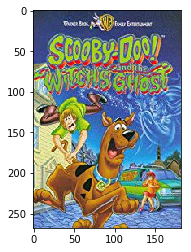

In [11]:
#test image list
plt.imshow(images[0])

In [23]:
#finding each unique label for categorical to numeric conversion
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x)) 
print(unique(genres))

['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'History' 'Horror' 'Music'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Short' 'Thriller' 'War' 'Western']
None


In [25]:
#Categorical to Numeric Conversion
num_y = []
for genre in genres:
    g = toNumeric(genre)
    num_y.append(g)
    
y = np.asarray(num_y)

In [26]:
#One-Hot-Encoding
y = np_utils.to_categorical(y, 22)

In [27]:
y.shape

(4953, 22)

In [28]:
X = np.asarray(images,dtype=float)

In [29]:
img_width = 182
img_height = 268

In [30]:
#Spliting Data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [31]:
print(X_train.shape)
print(y_train.shape)

(3467, 268, 182, 3)
(3467, 22)


In [32]:
#Normalizing Data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [33]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (3467, 268, 182, 3)
X_test shape: (1486, 268, 182, 3)
3467 train samples
1486 test samples


In [34]:
#defining the model
model = Sequential()

#input
model.add(Convolution2D(128, (3, 3), activation='relu', input_shape=(img_height, img_width,3)))
print(model.output_shape)


Instructions for updating:
Colocations handled automatically by placer.
(None, 266, 180, 128)


In [35]:
#convolutions

model.add(Convolution2D(64, (3, 3), activation='relu'))
print(model.output_shape)
model.add(MaxPooling2D(pool_size=(3, 3)))
print(model.output_shape)
model.add(Dropout(0.3))

model.add(Convolution2D(64, (2,2), activation='relu'))
print(model.output_shape)
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)
model.add(Dropout(0.3))

model.add(Convolution2D(64, (2,2), activation='relu'))
print(model.output_shape)
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)
model.add(Dropout(0.2))

(None, 264, 178, 64)
(None, 88, 59, 64)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(None, 87, 58, 64)
(None, 43, 29, 64)
(None, 42, 28, 64)
(None, 21, 14, 64)


In [36]:
#dense layers
model.add(Flatten())
print(model.output_shape)

model.add(Dense(44, activation='relu'))
print(model.output_shape)
model.add(Dropout(0.15))

model.add(Dense(22, activation='softmax'))
print(model.output_shape)
model.add(Dropout(0.15))

# model.add(Dense(8, activation='softmax'))
# print(model.output_shape)
# model.add(Dropout(0.15))


(None, 18816)
(None, 44)
(None, 22)


In [37]:

#printing model summary
print(model.summary())

#compiling the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
              optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 266, 180, 128)     3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 264, 178, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 88, 59, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 88, 59, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 87, 58, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 29, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 43, 29, 64)        0         
__________

In [38]:
print(model.output_shape)

(None, 22)


In [39]:
y_train.shape

(3467, 22)

In [40]:
X_test.shape

(1486, 268, 182, 3)

In [41]:
#training controls
batch_size = 32
epochs = 15
training_size = 0.7


In [42]:
#training the model
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/15
3467/3467 [==============================] - 631s 182ms/step - loss: 4.2336 - acc: 0.2362
Epoch 2/15
3467/3467 [==============================] - 583s 168ms/step - loss: 4.1039 - acc: 0.2668
Epoch 3/15
3467/3467 [==============================] - 590s 170ms/step - loss: 4.0736 - acc: 0.2760
Epoch 4/15
3467/3467 [==============================] - 584s 169ms/step - loss: 4.1294 - acc: 0.2861
Epoch 5/15
3467/3467 [==============================] - 584s 168ms/step - loss: 4.1551 - acc: 0.2830
Epoch 6/15
3467/3467 [==============================] - 583s 168ms/step - loss: 4.0704 - acc: 0.3014
Epoch 7/15
3467/3467 [==============================] - 582s 168ms/step - loss: 3.9983 - acc: 0.3072
Epoch 8/15
3467/3467 [==============================] - 583s 168ms/step - loss: 4.0677 - acc: 0.3164
Epoch 9/15
3467/3467 [==============================] - 584s 168ms/step - loss: 3.9135 - acc: 0.3259
Epoch 10/15
3467/3467 [====================

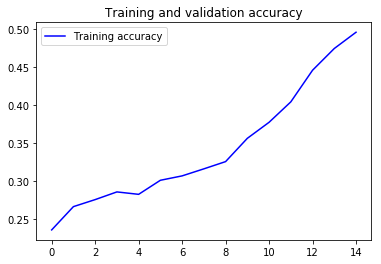

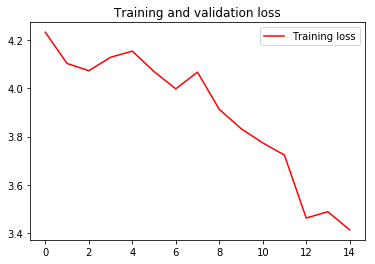

In [43]:
accuracy = history.history['acc']
#val_accuracy = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r-', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

In [44]:
#testing the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1486/1486 [==============================] - 111s 74ms/step
Test loss: 2.4766190700222954
Test accuracy: 0.3001345895220742
